seaborn库是以matplotlib为基础，同时支持numpy、pandas数据结构以及scipy和statsmodels的统计结果。

seaborn的主要功能有：
- 内置主题
- 丰富的调色板，更好的显示数据信息
- 对变量分布进行了可视化
- 数据矩阵可视化，并使用聚类算法发现这些矩阵中的结构
- 对自变量和因变量之间的线性回归结果进行可视化
- 绘制统计时间序列，并将其不确定性可视化
- 构建高级、抽象的网格图，可轻松将复杂问题可视化

### 1. 主题管理
seaborn的抢眼的亮点是内置了经过美化的主题，无序调制参数即可绘制漂亮的可视化。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#windows用户可使用下方的中文显示方法
#plt.rcParams['font.sans-serif'] = ['SimHei']
#plt.rcParams['axes.unicode_minus']=False

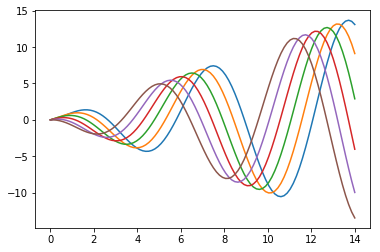

In [2]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        #随便设计的y函数
        plt.plot(x, np.sin(x+i*0.5)*x)
        
sinplot()

接下来，引入seaborn模块，sns.set_style(style)可以设置主题，

style参数可以传入字典或者``"darkgrid", "whitegrid", "dark", "white", "ticks"``


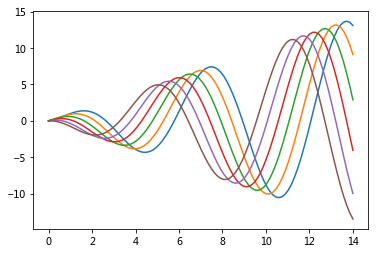

In [3]:
import seaborn as sns
#window有效，mac本代码无效
sns.set_style(style={"font.sans-serif":['Microsoft YaHei', 'SimHei']})
sinplot()

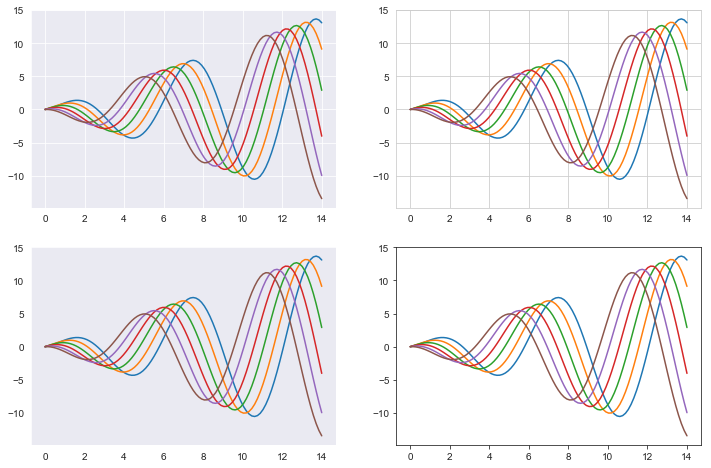

In [4]:
plt.figure(figsize=(12, 8))
sns.set_style('darkgrid')
plt.subplot(221)#在两行两列的画布中位于第一个位置（左上角）
sinplot()

sns.set_style('whitegrid')
plt.subplot(222)#在两行两列的画布中位于第2个位置（右上角）
sinplot()

sns.set_style('dark')
plt.subplot(223)#在两行两列的画布中位于第3个位置（左下角）
sinplot()

sns.set_style('ticks')
plt.subplot(224)#在两行两列的画布中位于第4个位置（右下角）
sinplot()

seaborn的sns.set_context(context, font_scale)函数的context一共有四种内置主题（paper、talk、poster、notebook），font_scale负责字体大小。

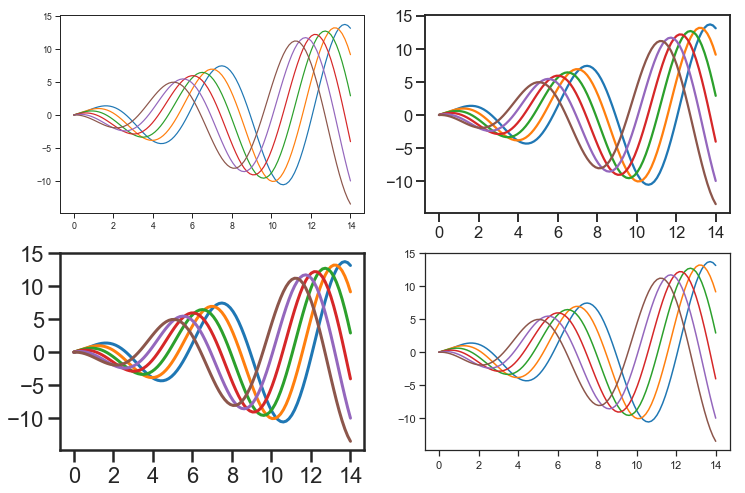

In [5]:
plt.figure(figsize=(12, 8))
sns.set_context('paper')
plt.subplot(221)#在两行两列的画布中位于第一个位置（左上角）
sinplot()

sns.set_context('talk')
plt.subplot(222)#在两行两列的画布中位于第2个位置（右上角）
sinplot()

sns.set_context('poster')
plt.subplot(223)#在两行两列的画布中位于第3个位置（左下角）
sinplot()

sns.set_context('notebook')
plt.subplot(224)#在两行两列的画布中位于第4个位置（右下角）
sinplot()

### 2.调色板
seaborn拥有丰富的调色板，大致分为循环、渐变、混合三类，利用sns.set_palette(palette, n_colors=None, desat=None)函数来进行设置。

- palette： seaborn颜色风格
- ncolors: 整数型，绘制的颜色种类
- desat: 每种颜色的去饱和度比例

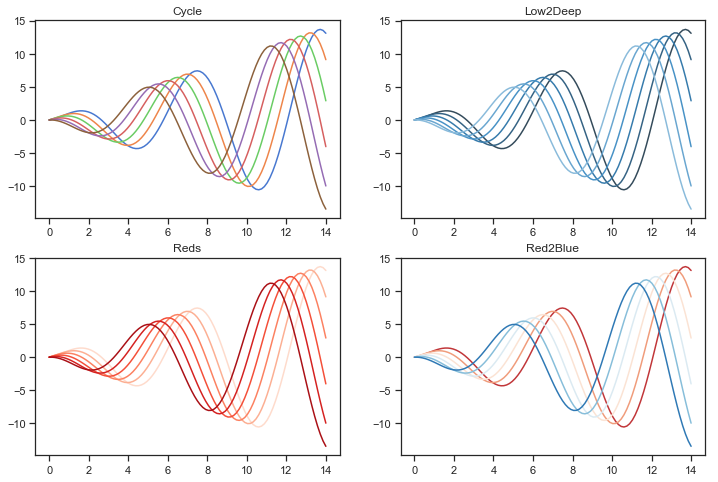

In [6]:
plt.figure(figsize=(12, 8))
sns.set_palette("muted")
plt.subplot(221)#在两行两列的画布中位于第一个位置（左上角）
plt.title('Cycle') #循环
sinplot()

sns.set_palette("Blues_d")
plt.subplot(222)#在两行两列的画布中位于第2个位置（右上角）
plt.title('Low2Deep') #由浅到深
sinplot()

sns.set_palette("Reds")
plt.subplot(223)#在两行两列的画布中位于第3个位置（左下角）
plt.title('Reds') #红
sinplot()

sns.set_palette("RdBu")
plt.subplot(224)#在两行两列的画布中位于第4个位置（右下角）
plt.title('Red2Blue') #由红到蓝
sinplot()

### 3.分布图
seaborn除了提供更美观的可视化，还提供辅助图形，使我们更快捷的得到可视化的结果。先看看最简单的正太分布直方图，在seaborn中，sns.distplot类似于matplotlib中的hist函数，但还提供了kde和rug参数选择是否显示核密度估计和边际毛毯图。

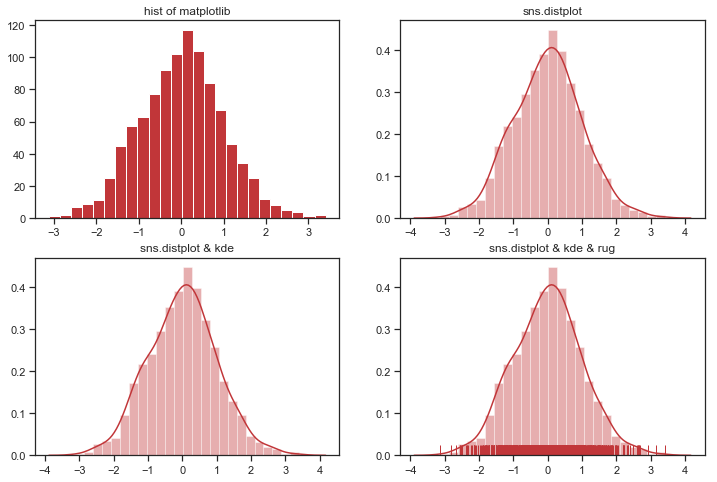

In [7]:
import numpy as np

size=1000
rn1 = np.random.standard_normal(size)
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.title('hist of matplotlib') 
plt.hist(rn1, bins=25)


plt.subplot(222)
plt.title('sns.distplot') 
sns.distplot(rn1, bins=25)


plt.subplot(223)
plt.title('sns.distplot & kde') 
sns.distplot(rn1, bins=25, kde=True)


plt.subplot(224)
plt.title('sns.distplot & kde & rug') 
sns.distplot(rn1, bins=25, kde=True, rug=True)

相比于matplotlib，使用seaborn画出的图更加美观。使用sns.joinplot()函数还可以更细致的显示两个变量之间的关系

sns.joinplot(x, y, data, kind):
- x:横坐标轴，dataframe中的列名
- y:纵坐标轴，dataframe中的列名
- data: dataframe数据
- kind: “scatter” | “reg” | “resid” | “kde” | “hex” 

In [10]:
import pandas as pd

tips = pd.read_csv('data/tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


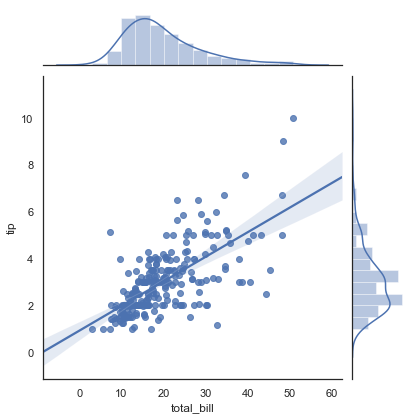

In [11]:
#plt.title('reg') 
sns.set(style="white")
#你们也可以回去试试kind的其他参数
sns.jointplot("total_bill", "tip", data=tips, kind="reg")

### 4.矩阵图
在金融领域中，我们常常需要利用heatmap将各种历史表现可视化。我们看看个股票月份的收益率汇总

In [42]:
import pandas as pd
import numpy as np

stocks = pd.read_excel('data/stock_data.xlsx')
date = stocks.pop('date')
returns = np.log(stocks.pct_change()+1)
returns['date'] = [str(t)[5:7] for t in date]
returns.dropna(inplace=True)
returns.set_index('date', inplace=True)
groupby_returns = returns.groupby(returns.index).sum()
groupby_returns

,000651,600519,601318,000858,600887,000333,601166,601328,600104
date,,,,,,,,,
01,0.292971,0.123673,0.100229,0.125343,0.101152,0.135820,0.150262,0.131705,0.135119
02,-0.016613,-0.023559,-0.110871,-0.060588,-0.067618,-0.021424,-0.063814,-0.009360,-0.005321
03,0.072956,0.069866,0.028950,0.023892,-0.125358,0.050013,-0.090390,-0.045641,-0.002064
04,0.040191,0.067840,0.025345,0.056512,-0.034978,0.010753,-0.047372,-0.034289,0.071092
05,0.032203,0.068825,0.171684,0.050986,0.061076,0.070537,0.068130,0.029462,0.098474
06,0.188999,0.063227,0.095976,0.150564,0.106442,0.175283,0.018558,-0.006473,0.032071
07,-0.048013,0.019663,0.047436,0.001795,-0.045484,-0.043692,0.052005,0.038221,-0.029746
08,-0.015150,0.020425,0.074259,-0.004854,0.122565,-0.004866,-0.006213,0.027737,-0.013697
09,-0.019596,0.052530,-0.033945,0.031749,0.164875,0.074926,-0.020607,-0.040316,0.015354


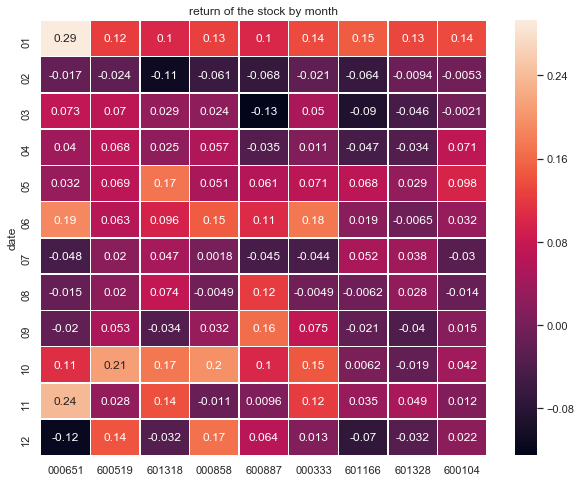

In [43]:
plt.figure(figsize=(10, 8))
plt.title('return of the stock by month')
sns.heatmap(groupby_returns, annot=True, linewidths=0.5)

### 5. 结构网络图
结构网络图可以帮助我们更直观的获取各变量之间的关系，如果使用matplotlib，不得不需要使用for循环，实现过程比较繁琐。而seaborn让这一切只需要一行代码即可实现。这里我们用sns.pairplot()

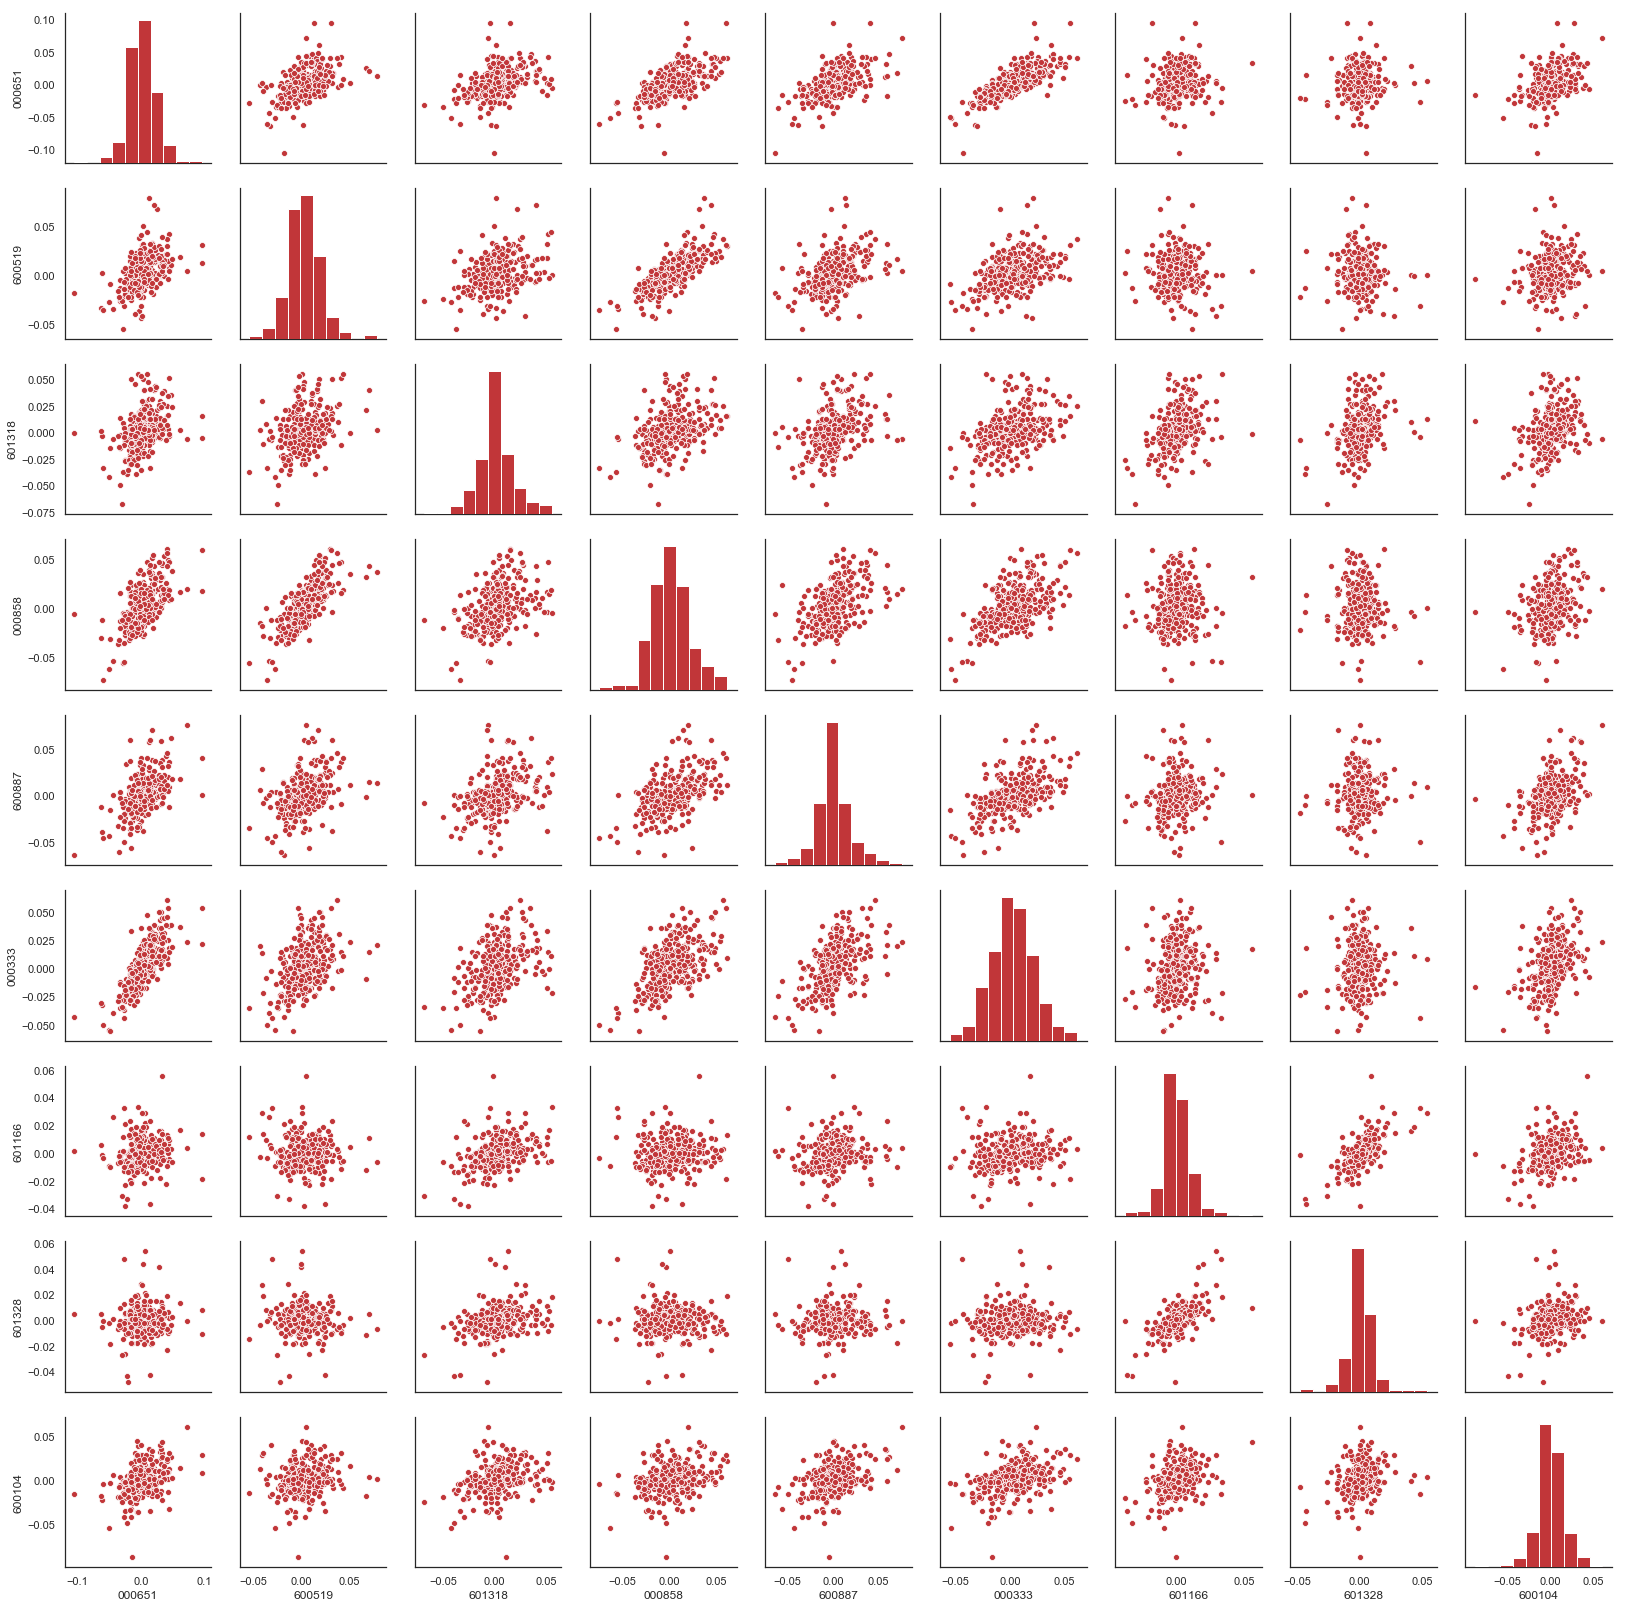

In [45]:
sns.pairplot(returns)

对角线是各个股票自身的对数收益率，学到这里有没有爱上python，喜欢上seaborn。感谢您的支持,大邓在这里提供了付费课程，如果你周围人有需要学习文本分析的，可以生产自己的课程邀请卡，每邀请一位您将获得23.88元现金红包。
![](文本分析视频教程.jpeg)